In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score,accuracy_score,log_loss,r2_score
from sklearn.model_selection import train_test_split,KFold , GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer ,make_column_selector
from sklearn.pipeline import Pipeline


In [2]:
concrete = pd.read_csv('Concrete_Data.csv')

In [3]:
X = concrete.drop('Strength',axis=1)
y = concrete['Strength']

In [4]:
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=24,test_size=0.3)

In [7]:
dtr = DecisionTreeRegressor(random_state=24)
dtr.fit(X_train,y_train)
y_pred = dtr.predict(X_test)
print(r2_score(y_test,y_pred))

0.83089474226832


In [16]:

dtr =DecisionTreeRegressor(random_state=24)

params = {'min_samples_split':[2,10,25,10],
         'min_samples_leaf':[1,2,5,7,10,25,50],
         'max_depth':[None,4,6]}
kfold = KFold(n_splits=5,shuffle=True,random_state=24)

gcv = GridSearchCV(dtr,param_grid=params,cv=kfold,scoring='r2',verbose=2)
gcv.fit(X,y)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=25; total time=   0.

GridSearchCV(cv=KFold(n_splits=5, random_state=24, shuffle=True),
             estimator=DecisionTreeRegressor(random_state=24),
             param_grid={'max_depth': [None, 4, 6],
                         'min_samples_leaf': [1, 2, 5, 7, 10, 25, 50],
                         'min_samples_split': [2, 10, 25, 10]},
             scoring='r2', verbose=2)

In [17]:
print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.8580807204193125


In [21]:
best_tree = gcv.best_estimator_

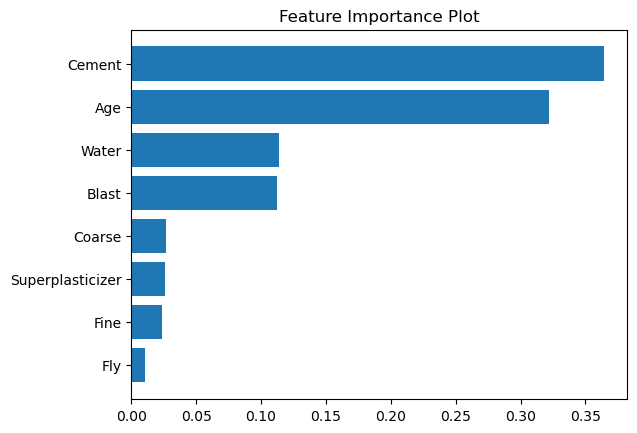

In [22]:
df_imp = pd.DataFrame({'feature':list(X.columns),'importance':best_tree.feature_importances_})
df_imp.sort_values('importance',inplace=True)
plt.barh(df_imp['feature'],df_imp['importance'])
plt.title('Feature Importance Plot')
plt.show()